In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle

In [62]:
# Loading Data file 
data = pd.read_csv("heart_failure_clinical_records.csv")

data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [63]:
# print length of data
print(len(data))



5000


/Users/deveshdhyani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/deveshdhyani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/deveshdhyani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/deveshdhyani/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

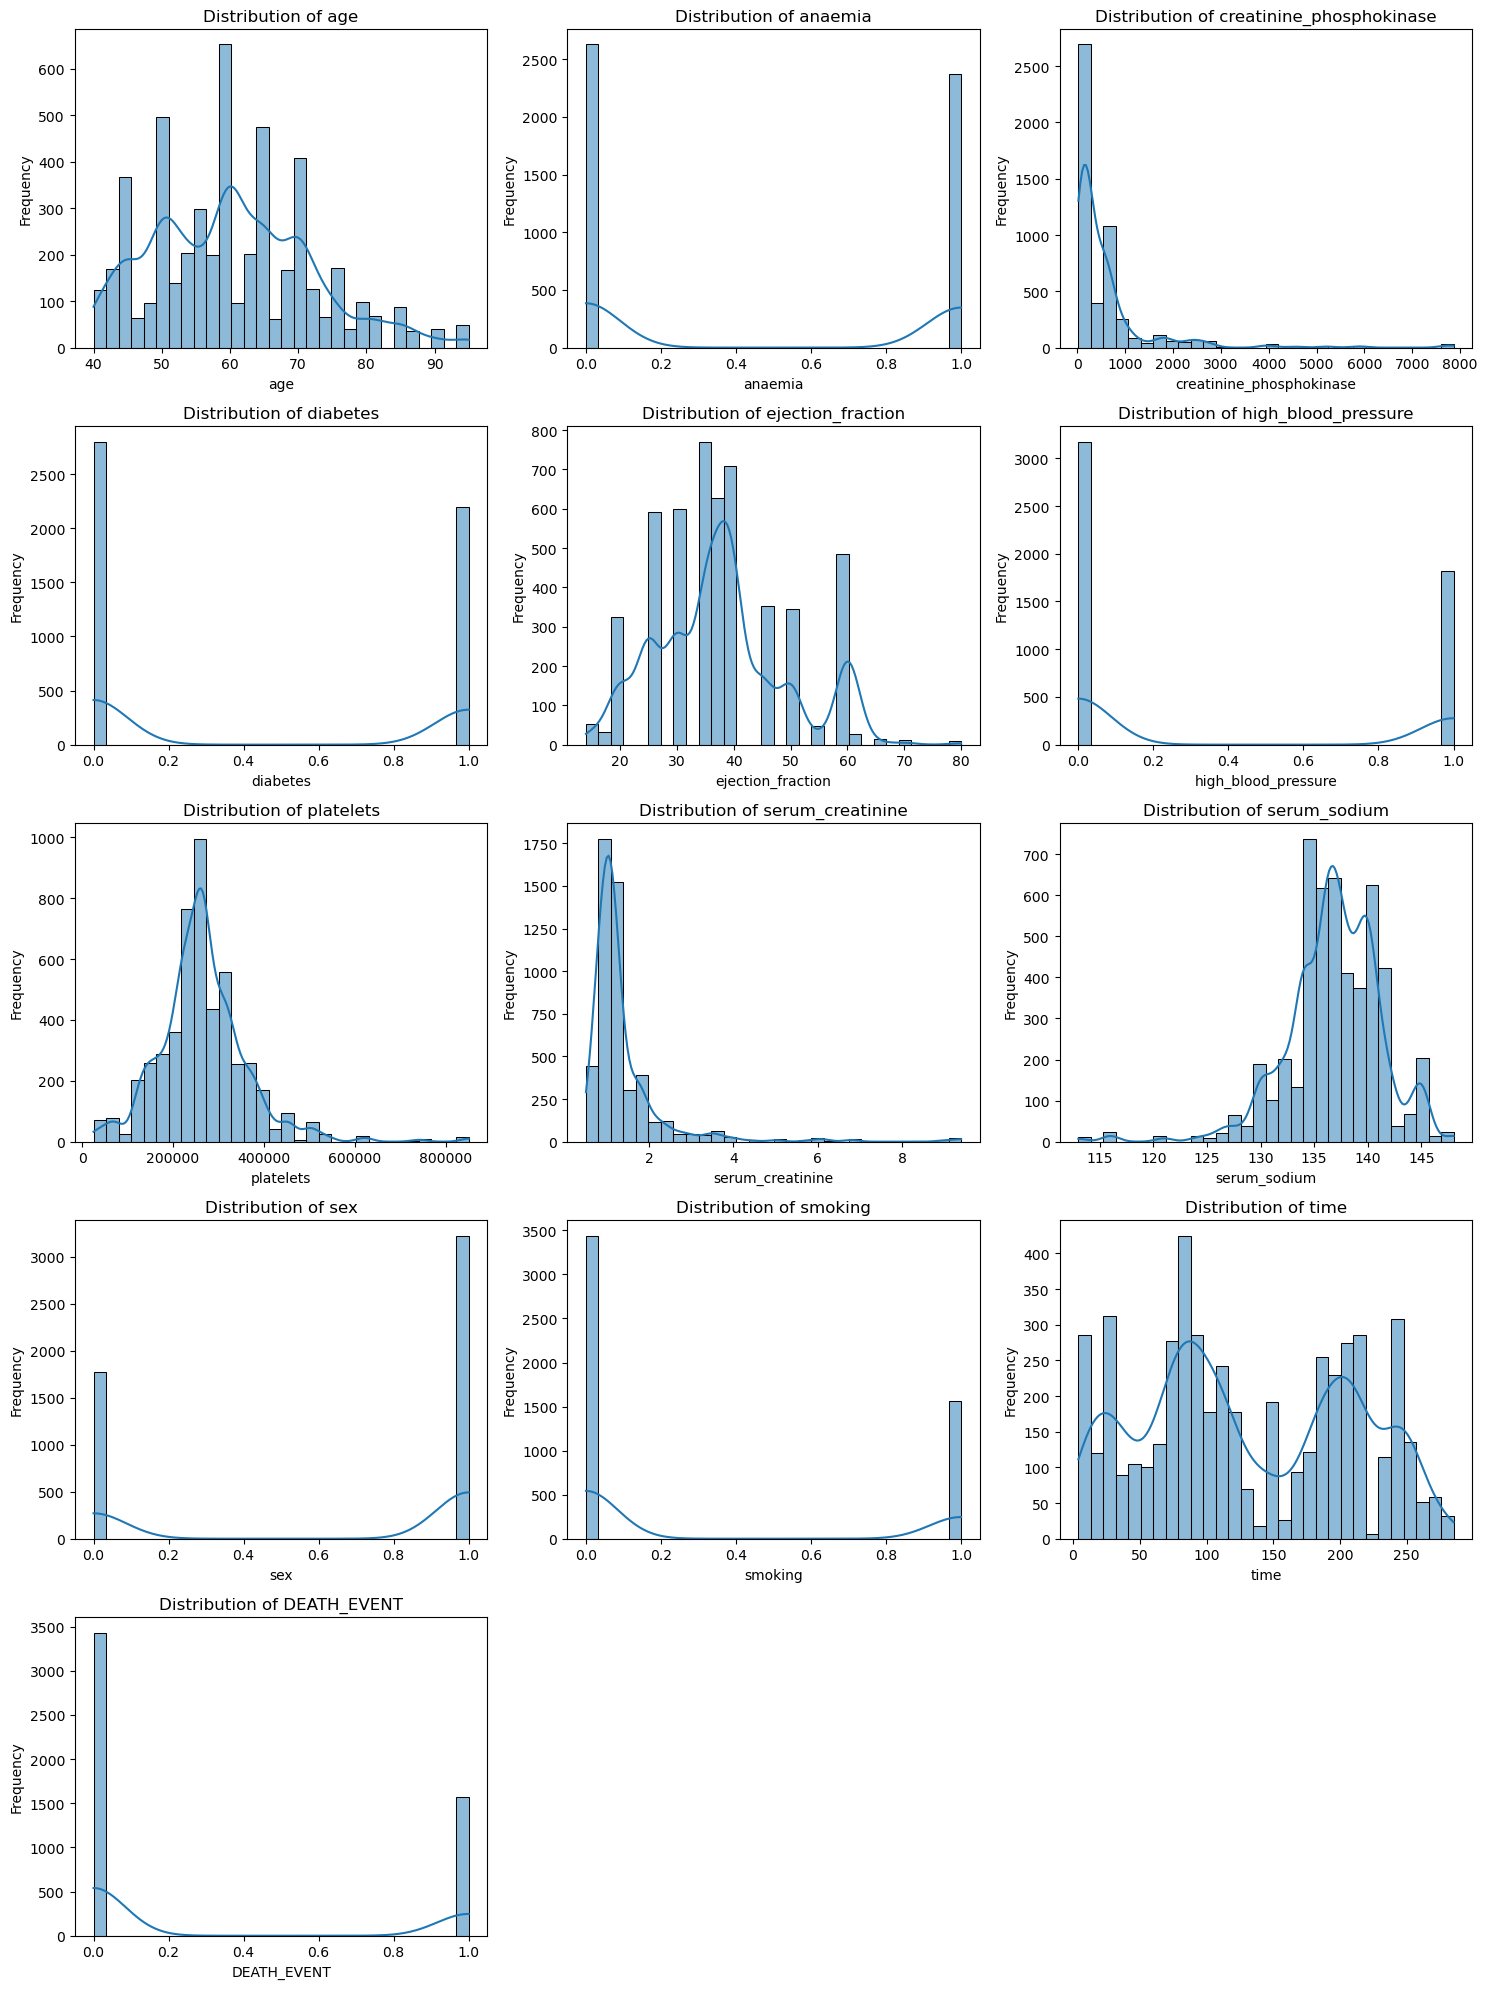

In [64]:


# Set up the matplotlib figure
plt.figure(figsize=(15, 20))

# List of numerical columns to plot
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [65]:
# dividing the data into dependent and indipendent
# dependent variables are the ones that we want to predict  
# indipendent variables are the ones that we use to predict the dependent variables

X= data.drop('DEATH_EVENT',axis=1)
y= data['DEATH_EVENT']

In [66]:
# spliting data into test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# Scale these feature 
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [68]:
X_train

array([[-0.20303067,  1.0523695 , -0.53412677, ...,  0.74431281,
         1.50597937,  0.95350361],
       [-0.88759513, -0.95023659, -0.39656197, ...,  0.74431281,
         1.50597937,  1.98540252],
       [-0.88759513, -0.95023659, -0.22534822, ...,  0.74431281,
        -0.66401972, -0.52985107],
       ...,
       [-0.88759513,  1.0523695 , -0.48068433, ...,  0.74431281,
        -0.66401972, -1.60044619],
       [ 1.67952159, -0.95023659,  0.20615001, ...,  0.74431281,
        -0.66401972, -0.28477508],
       [-0.03188956,  1.0523695 , -0.27879066, ...,  0.74431281,
         1.50597937, -1.56174998]])

In [69]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

ANN

In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [71]:
# Building an ANN Model
model=Sequential([
    Dense(64,activation='relu',input_shape= (X_train.shape[1],)), # 1st HL connected with input layer 
    Dense(32,activation='relu'), # 2nd HL
    Dense(1,activation='sigmoid') # output layer
])


In [72]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                832       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
#Compiling the model 
model.compile(optimizer="adam",loss= "binary_crossentropy",metrics=['accuracy'])

In [74]:
#Setup the tensorboard 
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

log_dir= "log/fit"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_dir,histogram_freq=1)

In [75]:
# Setup early stoping 
early_stopping_callback= EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

In [76]:
#Train model 
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/100


125/125 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.7832 - val_loss: 0.3507 - val_accuracy: 0.8490
Epoch 2/100
125/125 [==============================] - 0s 649us/step - loss: 0.3105 - accuracy: 0.8673 - val_loss: 0.2958 - val_accuracy: 0.8760
Epoch 3/100
125/125 [==============================] - 0s 627us/step - loss: 0.2631 - accuracy: 0.8907 - val_loss: 0.2617 - val_accuracy: 0.8940
Epoch 4/100
125/125 [==============================] - 0s 620us/step - loss: 0.2285 - accuracy: 0.9072 - val_loss: 0.2359 - val_accuracy: 0.9060
Epoch 5/100
125/125 [==============================] - 0s 624us/step - loss: 0.1983 - accuracy: 0.9243 - val_loss: 0.2119 - val_accuracy: 0.9190
Epoch 6/100
125/125 [==============================] - 0s 620us/step - loss: 0.1745 - accuracy: 0.9373 - val_loss: 0.1914 - val_accuracy: 0.9320
Epoch 7/100
125/125 [==============================] - 0s 616us/step - loss: 0.1533 - accuracy: 0.9495 - val_loss: 0.1724 - val_accuracy: 0.9390

In [77]:
model.save('model.h5')

/Users/deveshdhyani/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
#Load tensorboard extention 
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [83]:
%tensorboard --logdir log/fit20240702-132921

Reusing TensorBoard on port 6008 (pid 23394), started 0:00:10 ago. (Use '!kill 23394' to kill it.)